# Analyzing what affects the number of cab rides in a given 2 year period to decide which company to invest in.

In [55]:
#Importing pandas
import pandas as pd
#Importing numpy
import numpy as np
# Importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#Importing seaborn
import seaborn as sns

## Part 1:- Main datasets EDA and visualizations

In [56]:
#Importing the datasets provided by Data Glacier
#Importing cab data
df1 = pd.read_csv('Cab_Data.csv')
#Importing city data
df2 = pd.read_csv('City.csv')
#Importing customer ID data
df3 = pd.read_csv('Customer_ID.csv')
#Importing transaction ID data
df4 = pd.read_csv('Transaction_ID.csv')
#Creating a list for these dataframes
dgdfs = [df1, df2, df3, df4]
#Naming what these dataframes contain
dgdfnames = ["All the data", "Data about the cities", "Data about the customers", "Data for the transactions"]

In [57]:
#Looking at the shape of the dataframes
datashape = [x.shape for x in dgdfs]
for (x,y) in zip(dgdfnames, datashape):
    print(x + " : " + str(y))

All the data : (359392, 7)
Data about the cities : (20, 3)
Data about the customers : (49171, 4)
Data for the transactions : (440098, 3)


The main dataframe has 359392 rows and 7 columns. There are 20 rows and 3 columns for the city data, 49171 rows and 4 columns in the customer data and 440098 and 3 columns in the data about each transaction. 

In [58]:
#Looking at the shape of the dataframes
datasize = [x.memory_usage(deep=True).sum() for x in dgdfs]
for (x,y) in zip(dgdfnames, datasize):
    print(x + " : " + str(y))

All the data : 62831931
Data about the cities : 4124
Data about the customers : 4224881
Data for the transactions : 33887674


The observations above are in binary bytes. Thus, I will convert them to a human readable format and then pass in this list.

In [59]:
#This function is defined to convert a size in bytes to a human-readable format in KB, MB, or GB

def convert_size(size_bytes):

    KB = 1024
    MB = KB ** 2
    GB = KB ** 3

    if size_bytes >= GB:
        size_str = f"{size_bytes / GB:.2f} GB"
    elif size_bytes >= MB:
        size_str = f"{size_bytes / MB:.2f} MB"
    elif size_bytes >= KB:
        size_str = f"{size_bytes / KB:.2f} KB"
    else:
        size_str = f"{size_bytes} bytes"
    return size_str

In [60]:
#Looking at the size of the dataframes
for x in datasize:
    finaldatasize = convert_size(x)
    print(finaldatasize)

59.92 MB
4.03 KB
4.03 MB
32.32 MB


The dataset with all the data has a size of 59.92 MB, the city dataset has a size of 4.03 KB, the customer dataset has a size of 4.03 MB and the transactions dataset has a size of 32.32 MB.

In [61]:
#Printing out the column names for each dataframe
datacolumns = [x.columns for x in dgdfs]
for (x,y) in zip(dgdfnames, datacolumns):
    print(x + " : " + str(y))

All the data : Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')
Data about the cities : Index(['City', 'Population', 'Users'], dtype='object')
Data about the customers : Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')
Data for the transactions : Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')


The column names are 'Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',  'Price Charged' and 'Cost of Trip' 
for the main dataframe, City', 'Population' and 'Users' for the data about cities, 'Customer ID', 'Gender', 'Age' and 'Income (USD/Month)' for the data about customers and 'Transaction ID', 'Customer ID', 'Payment_Mode' for the data about transactions.

In [62]:
#Looking at some general information for these columns in these dataframes
datainfo = [x.info() for x in dgdfs]
print(datainfo)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0

By looking into these tables, we can see that df1 is the raw data for every single ride and the next three tables are related to the first table by including specific information on the cities, customers and transactions of these rides. 

There is not a single null value in the entire dataframe. In the main dataframe, there are 7 variables, 2 of which are categorical variables('Company' and 'City'), 2 int64 variables('Transaction ID' and 'Date of Travel') and finally 3 float64 variables('KM Travelled', 'Cost of Trip' and 'Price Charged'). In the city dataframe, all the columns are categorical. In the customer dataframe, everything is of the int64 data type except gender which is categorical and the same is true for the transaction dataframe where the categorical variable is the Payment_Mode. We will need to convert the Date of Travel column from an int64 datatype to a date datatype and the population and users columns from a object data type to an int data type.

In [63]:
#These lines of code are used to convert the 'Date of Travel' column from an int64 data type to a date data type
#Importing the datetime and timedelta packages from the datetime module
from datetime import datetime, timedelta

#Creating a function to convert the dates from int64 to date objects
def to_date(x):

    # Add the number of days to January 1, 1900 to get the corresponding date
    if type(x) == int: 
        date_obj = datetime(1900, 1, 1) + timedelta(x - 2)
        return date_obj
    elif type(x) == str and x.format() in formats:
        date_obj = datetime.strptime(x, x.format()) 
        return date_obj   
    else:
        return None

#Creating an empty list
y = []

#This loop converts the date values from an int64 list to a list of date objects
for x in df1['Date of Travel']:
    a = to_date(x)
    y.append(a)
    
#Dropping the date of travel column    
df1 = df1.drop(columns='Date of Travel', axis=1)

#Adding a new column to the dataframe
df1['Date of Travel'] = pd.Series(y)

#Replacing the old data frame with a new one
dgdfs.pop(0)
dgdfs.insert(0, df1)

#Viewing the dataframe
print(df1)

        Transaction ID     Company           City  KM Travelled  \
0             10000011    Pink Cab     ATLANTA GA         30.45   
1             10000012    Pink Cab     ATLANTA GA         28.62   
2             10000013    Pink Cab     ATLANTA GA          9.04   
3             10000014    Pink Cab     ATLANTA GA         33.17   
4             10000015    Pink Cab     ATLANTA GA          8.73   
...                ...         ...            ...           ...   
359387        10440101  Yellow Cab  WASHINGTON DC          4.80   
359388        10440104  Yellow Cab  WASHINGTON DC          8.40   
359389        10440105  Yellow Cab  WASHINGTON DC         27.75   
359390        10440106  Yellow Cab  WASHINGTON DC          8.80   
359391        10440107  Yellow Cab  WASHINGTON DC         12.76   

        Price Charged  Cost of Trip Date of Travel  
0              370.95      313.6350     2016-01-08  
1              358.52      334.8540     2016-01-06  
2              125.20       97.6320 

In [64]:
#And these lines of code will convert the city population to numerical int data types.
y = []
for x in df2["Population"]:
    z = int(x.strip().replace(',',''))
    y.append(z)

#Dropping the date of travel column    
df2 = df2.drop(columns='Population', axis=1)

#Adding a new column to the dataframe
df2['Population'] = pd.Series(y)

#Replacing the old data frame with a new one
dgdfs.pop(1)
dgdfs.insert(1, df2)

#Viewing the dataframe
print(df2)


                City      Users  Population
0        NEW YORK NY   302,149      8405837
1         CHICAGO IL   164,468      1955130
2     LOS ANGELES CA   144,132      1595037
3           MIAMI FL    17,675      1339155
4     SILICON VALLEY    27,247      1177609
5      ORANGE COUNTY    12,994      1030185
6       SAN DIEGO CA    69,995       959307
7         PHOENIX AZ     6,133       943999
8          DALLAS TX    22,157       942908
9         ATLANTA GA    24,701       814885
10         DENVER CO    12,421       754233
11         AUSTIN TX    14,978       698371
12        SEATTLE WA    25,063       671238
13         TUCSON AZ     5,712       631442
14  SAN FRANCISCO CA   213,609       629591
15     SACRAMENTO CA     7,044       545776
16     PITTSBURGH PA     3,643       542085
17     WASHINGTON DC   127,001       418859
18      NASHVILLE TN     9,270       327225
19         BOSTON MA    80,021       248968


In [65]:
#And these lines of code will convert the city taxi cab users to numerical int data types.
y = []
for x in df2["Users"]:
    z = int(x.strip().replace(',',''))
    y.append(z)

#Dropping the date of travel column    
df2 = df2.drop(columns='Users', axis=1)

#Adding a new column to the dataframe
df2['Users'] = pd.Series(y)

#Replacing the old data frame with a new one
dgdfs.pop(1)
dgdfs.insert(1, df2)

#Viewing the dataframe
print(df2)

                City  Population   Users
0        NEW YORK NY     8405837  302149
1         CHICAGO IL     1955130  164468
2     LOS ANGELES CA     1595037  144132
3           MIAMI FL     1339155   17675
4     SILICON VALLEY     1177609   27247
5      ORANGE COUNTY     1030185   12994
6       SAN DIEGO CA      959307   69995
7         PHOENIX AZ      943999    6133
8          DALLAS TX      942908   22157
9         ATLANTA GA      814885   24701
10         DENVER CO      754233   12421
11         AUSTIN TX      698371   14978
12        SEATTLE WA      671238   25063
13         TUCSON AZ      631442    5712
14  SAN FRANCISCO CA      629591  213609
15     SACRAMENTO CA      545776    7044
16     PITTSBURGH PA      542085    3643
17     WASHINGTON DC      418859  127001
18      NASHVILLE TN      327225    9270
19         BOSTON MA      248968   80021


In [66]:
#Looking at some general information for these columns in these dataframes again
datainfo = [x.info() for x in dgdfs]
print(datainfo)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Company         359392 non-null  object        
 2   City            359392 non-null  object        
 3   KM Travelled    359392 non-null  float64       
 4   Price Charged   359392 non-null  float64       
 5   Cost of Trip    359392 non-null  float64       
 6   Date of Travel  359392 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
m

In [67]:
#Taking a high-level look at all the data's first twenty rows for all twenty rows
dataskim = [x.head(n=20) for x in dgdfs]
for (x,y) in zip(dgdfnames, dataskim):
    print(x + " : " + str(y))

All the data :     Transaction ID   Company        City  KM Travelled  Price Charged  \
0         10000011  Pink Cab  ATLANTA GA         30.45         370.95   
1         10000012  Pink Cab  ATLANTA GA         28.62         358.52   
2         10000013  Pink Cab  ATLANTA GA          9.04         125.20   
3         10000014  Pink Cab  ATLANTA GA         33.17         377.40   
4         10000015  Pink Cab  ATLANTA GA          8.73         114.62   
5         10000016  Pink Cab  ATLANTA GA          6.06          72.43   
6         10000017  Pink Cab   AUSTIN TX         44.00         576.15   
7         10000018  Pink Cab   AUSTIN TX         35.65         466.10   
8         10000019  Pink Cab   BOSTON MA         14.40         191.61   
9         10000020  Pink Cab   BOSTON MA         10.89         156.98   
10        10000021  Pink Cab   BOSTON MA         39.60         570.83   
11        10000022  Pink Cab   BOSTON MA         21.80         317.27   
12        10000023  Pink Cab   BOSTO

In [68]:
#Looking at basic summary statistics
datastats = [x.describe() for x in dgdfs]
for (x,y) in zip(dgdfnames, datastats):
    print(x + " : " + str(y))

All the data :        Transaction ID   KM Travelled  Price Charged   Cost of Trip
count    3.593920e+05  359392.000000  359392.000000  359392.000000
mean     1.022076e+07      22.567254     423.443311     286.190113
std      1.268058e+05      12.233526     274.378911     157.993661
min      1.000001e+07       1.900000      15.600000      19.000000
25%      1.011081e+07      12.000000     206.437500     151.200000
50%      1.022104e+07      22.440000     386.360000     282.480000
75%      1.033094e+07      32.960000     583.660000     413.683200
max      1.044011e+07      48.000000    2048.030000     691.200000
Data about the cities :          Population          Users
count  2.000000e+01      20.000000
mean   1.231592e+06   64520.650000
std    1.740127e+06   83499.375289
min    2.489680e+05    3643.000000
25%    6.086372e+05   11633.250000
50%    7.845590e+05   23429.000000
75%    1.067041e+06   91766.000000
max    8.405837e+06  302149.000000
Data about the customers :         Customer

Here are the most interesting insights from the numerical data we did not already know:-
1) The median km travelled is 22.4 whereas the mean is 22.6 in addition to a standard deviation of 12.2.
2) The median price charged is $386.4, the mean is 423.4 and the numbers have a standard deviation of 274.4. This suggests the highest prices are a lot further from the mean than the lowest prices(2048 vs 15.6)
3) The cost of the trip is much more uniformly distributed with there being a mean of 286.2, a median of 282.5 and a standard deviation of 158.
4) New York City has the highest population with 8405837 people and 302149 users.
5) The average age of the customers is 35.4 and the median is 33. The standard deviation is 12.6.
6) The average income is 15015.6 with a median of 14656 and a standard deviation of 8002.2.
7) The customer IDs range from 1 to 60000.

In [69]:
#Taking a high-level look at all the data's first twenty rows for all twenty rows
datastats = [x.describe(include="object") for x in dgdfs]
for (x,y) in zip(dgdfnames, datastats):
    print(x + " : " + str(y))

All the data :            Company         City
count       359392       359392
unique           2           19
top     Yellow Cab  NEW YORK NY
freq        274681        99885
Data about the cities :                City
count            20
unique           20
top     NEW YORK NY
freq              1
Data about the customers :        Gender
count   49171
unique      2
top      Male
freq    26562
Data for the transactions :        Payment_Mode
count        440098
unique            2
top            Card
freq         263991


Interesting insights:-
1) Yellow cabs have the highest number of users with 274681 and New York City had 99885 users.
2) There are more males than females(26562 vs 22609).
3) More transactions are done in card than cash(177907).

In [70]:
#Reprinting out the column names for each dataframe so they are in the correct order. Values are the same.
datacolumns = [x.columns for x in dgdfs]
for (x,y) in zip(dgdfnames, datacolumns):
    print(x + " : " + str(y))

All the data : Index(['Transaction ID', 'Company', 'City', 'KM Travelled', 'Price Charged',
       'Cost of Trip', 'Date of Travel'],
      dtype='object')
Data about the cities : Index(['City', 'Population', 'Users'], dtype='object')
Data about the customers : Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')
Data for the transactions : Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')


In [71]:
#Looking at the total number of values of each column
for (x,y) in zip(dgdfs, datacolumns):
    for z in y:
        a = x[[z]].value_counts()
        print(a)

Transaction ID
10000011          1
10292640          1
10292648          1
10292647          1
10292646          1
                 ..
10147186          1
10147185          1
10147184          1
10147183          1
10440107          1
Length: 359392, dtype: int64
Company   
Yellow Cab    274681
Pink Cab       84711
dtype: int64
City          
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
dtype: int64
KM Travelled
33.60           1536
24.00           1080
22.80           1075
35.70           1069
16.80           1065
                ... 
29.58            308
12.24            306
3.51 

Interesting insights:-
1) All transactions had a unique ID.
2) The most common date of travel was 2018-01-05 with 2022 unique results.
3) Chicago, LA, DC and Boston were the next highest users of cabs.
4) The most common price charged was $298.32.
5) The trip cost $362.88 on average.
6) 20 year olds were the most common users of taxis followed by 34, 39 and 23 year olds in this data.

In [72]:
#Looking at the percentage of each value in each column
for (x,y) in zip(dgdfs, datacolumns):
    for z in y:
        a = x[[z]].value_counts(normalize = True)
        print(a)

Transaction ID
10000011          0.000003
10292640          0.000003
10292648          0.000003
10292647          0.000003
10292646          0.000003
                    ...   
10147186          0.000003
10147185          0.000003
10147184          0.000003
10147183          0.000003
10440107          0.000003
Length: 359392, dtype: float64
Company   
Yellow Cab    0.764294
Pink Cab      0.235706
dtype: float64
City          
NEW YORK NY       0.277928
CHICAGO IL        0.157558
LOS ANGELES CA    0.133651
WASHINGTON DC     0.121697
BOSTON MA         0.082617
SAN DIEGO CA      0.057007
SILICON VALLEY    0.023704
SEATTLE WA        0.022251
ATLANTA GA        0.021027
DALLAS TX         0.019525
MIAMI FL          0.017958
AUSTIN TX         0.013623
ORANGE COUNTY     0.011080
DENVER CO         0.010643
NASHVILLE TN      0.008375
SACRAMENTO CA     0.006586
PHOENIX AZ        0.005743
TUCSON AZ         0.005373
PITTSBURGH PA     0.003653
dtype: float64
KM Travelled
33.60           0.004274
24.0

Interesting insights:-
1) 76.4% of users used yellow cabs.
2) 27.8% of users rode in New York City.
3) 0.43% of users travelled 33.6 km.
4) 0.005% of users were charged $298.32 or $191.72 which were the most common prices.
5) 0.052% and 0.051% of trips cost $362.88 or $479.808 which were the most common observations.
6) 54% of riders were men.
7) 3.33% of riders were 20 years old.
8) The most common income was $8497 which had 0.02 percent of incomes.
9) Around 60% of riders paid in card.

In [73]:
#Creating a master dataset with each and every transaction
dfdg = df1.merge(df4, on= 'Transaction ID').merge(df3, on ='Customer ID').merge(df2, on = 'City')
dfdg.head(n= 20)

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date of Travel,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,29290,Card,Male,28,10813,814885,24701
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21,29290,Cash,Male,28,10813,814885,24701
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23,29290,Card,Male,28,10813,814885,24701
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,27703,Card,Male,27,9237,814885,24701
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-21,27703,Card,Male,27,9237,814885,24701
5,10324737,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,2018-05-04,27703,Cash,Male,27,9237,814885,24701
6,10395626,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,2018-10-27,27703,Card,Male,27,9237,814885,24701
7,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016-01-02,28712,Cash,Male,53,11242,814885,24701
8,10079404,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,2016-09-21,28712,Card,Male,53,11242,814885,24701
9,10186994,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,2017-06-23,28712,Card,Male,53,11242,814885,24701


Text(0, 0.5, 'Number of transactions')

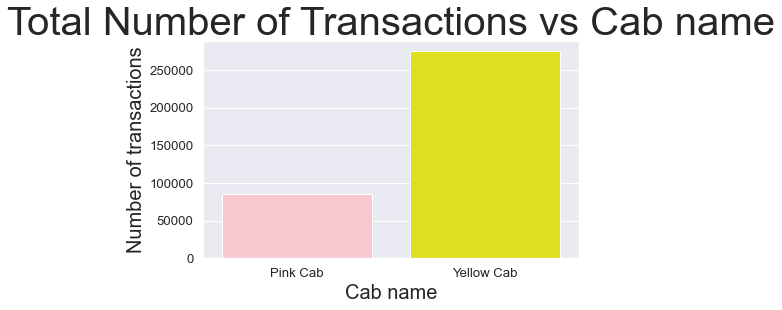

In [74]:
#Plotting the total number of transactions per cab company
figure1 = sns.countplot(x="Company", data=dfdg, palette=["pink","yellow"])
plt.title("Total Number of Transactions vs Cab name", fontsize = 40)
sns.set_style("whitegrid")
figure1.set_xlabel("Cab name", fontsize = 20)
figure1.set_ylabel("Number of transactions", fontsize = 20)


This means significantly more people use yellow cabs than pink cabs.

Text(0, 0.5, 'Number of transactions')

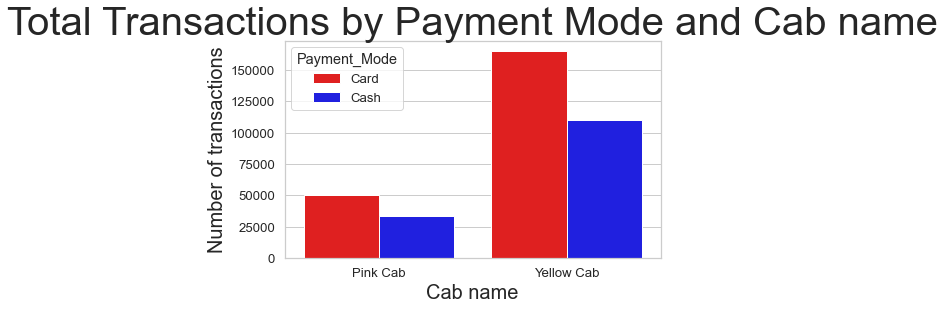

In [75]:
#Plotting the total number of transactions per cab company by method of payment
figure2 = sns.countplot(x="Company", hue="Payment_Mode", data=dfdg, orient="h", palette=["red","blue"])
plt.title("Total Transactions by Payment Mode and Cab name", fontsize = 40)
sns.set_style("whitegrid")
figure2.set_xlabel("Cab name", fontsize = 20)
figure2.set_ylabel("Number of transactions", fontsize = 20)

This means more people pay with card at both companies.

Text(0, 0.5, 'Number of transaction')

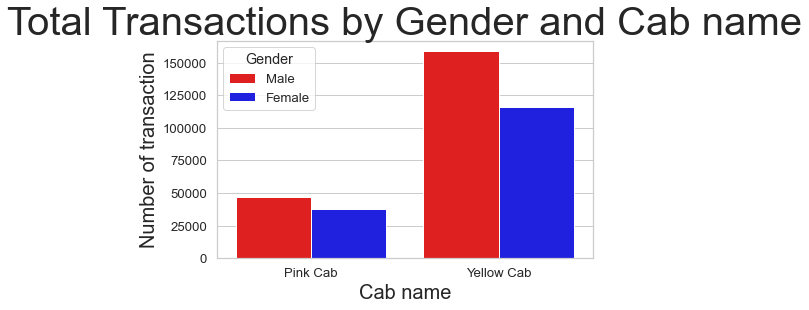

In [76]:
#Plotting the total number of transactions per cab company by gender
figure3 = sns.countplot(x="Company", hue="Gender", data=dfdg, orient="h", palette=["red","blue"])
plt.title("Total Transactions by Gender and Cab name", fontsize = 40)
sns.set_style("whitegrid")
figure3.set_xlabel("Cab name", fontsize = 20)
figure3.set_ylabel("Number of transaction", fontsize = 20)

This means there are more males at both companies.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'NEW YORK NY'),
  Text(1, 0, 'CHICAGO IL'),
  Text(2, 0, 'LOS ANGELES CA'),
  Text(3, 0, 'MIAMI FL'),
  Text(4, 0, 'SILICON VALLEY'),
  Text(5, 0, 'ORANGE COUNTY'),
  Text(6, 0, 'SAN DIEGO CA'),
  Text(7, 0, 'PHOENIX AZ'),
  Text(8, 0, 'DALLAS TX'),
  Text(9, 0, 'ATLANTA GA'),
  Text(10, 0, 'DENVER CO'),
  Text(11, 0, 'AUSTIN TX'),
  Text(12, 0, 'SEATTLE WA'),
  Text(13, 0, 'TUCSON AZ'),
  Text(14, 0, 'SAN FRANCISCO CA'),
  Text(15, 0, 'SACRAMENTO CA'),
  Text(16, 0, 'PITTSBURGH PA'),
  Text(17, 0, 'WASHINGTON DC'),
  Text(18, 0, 'NASHVILLE TN'),
  Text(19, 0, 'BOSTON MA')])

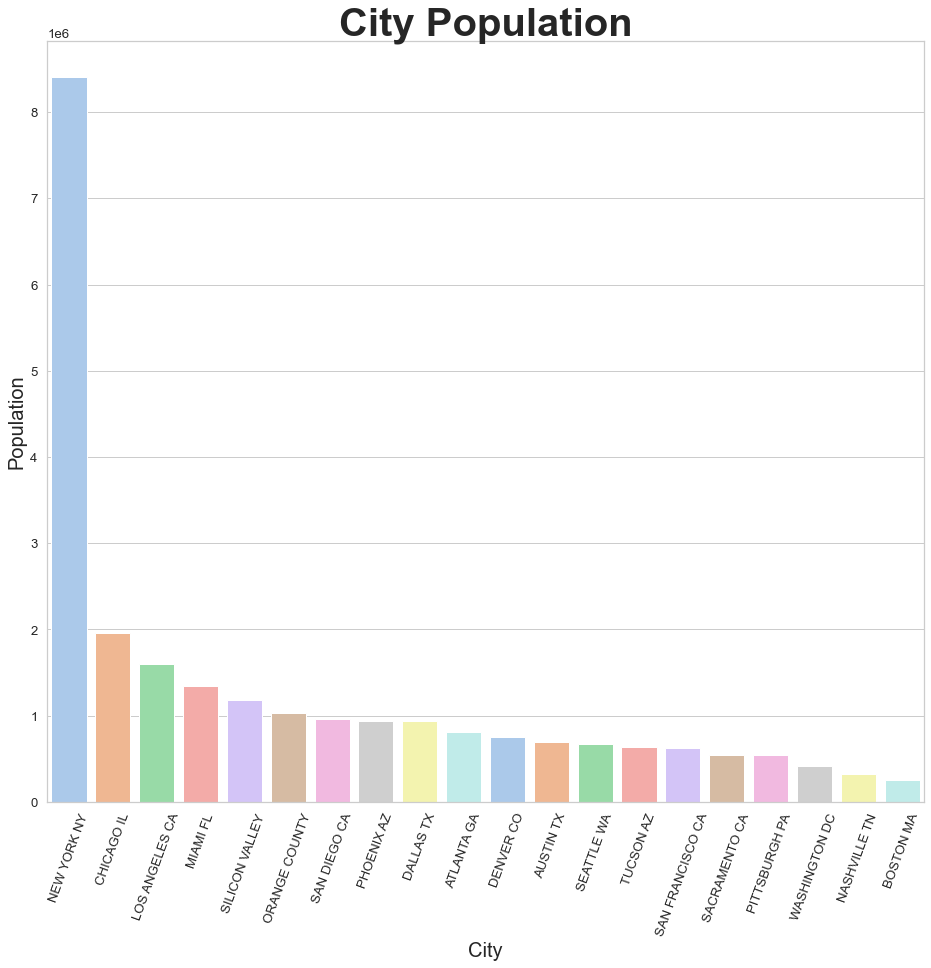

In [77]:
#Plotting the population per city
plt.figure(figsize=(14,14))
figure4 = sns.barplot(x="City", y="Population", data=df2, palette="pastel")
plt.title("City Population", fontweight='bold', fontsize = 40)
sns.set_style("whitegrid")
figure4.set_xlabel("City", fontsize = 20)
figure4.set_ylabel("Population", fontsize = 20)
plt.xticks(rotation=70)

NYC has the highest population followed by Chicago and Boston has the lowest.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'NEW YORK NY'),
  Text(1, 0, 'SAN FRANCISCO CA'),
  Text(2, 0, 'CHICAGO IL'),
  Text(3, 0, 'LOS ANGELES CA'),
  Text(4, 0, 'WASHINGTON DC'),
  Text(5, 0, 'BOSTON MA'),
  Text(6, 0, 'SAN DIEGO CA'),
  Text(7, 0, 'SILICON VALLEY'),
  Text(8, 0, 'SEATTLE WA'),
  Text(9, 0, 'ATLANTA GA'),
  Text(10, 0, 'DALLAS TX'),
  Text(11, 0, 'MIAMI FL'),
  Text(12, 0, 'AUSTIN TX'),
  Text(13, 0, 'ORANGE COUNTY'),
  Text(14, 0, 'DENVER CO'),
  Text(15, 0, 'NASHVILLE TN'),
  Text(16, 0, 'SACRAMENTO CA'),
  Text(17, 0, 'PHOENIX AZ'),
  Text(18, 0, 'TUCSON AZ'),
  Text(19, 0, 'PITTSBURGH PA')])

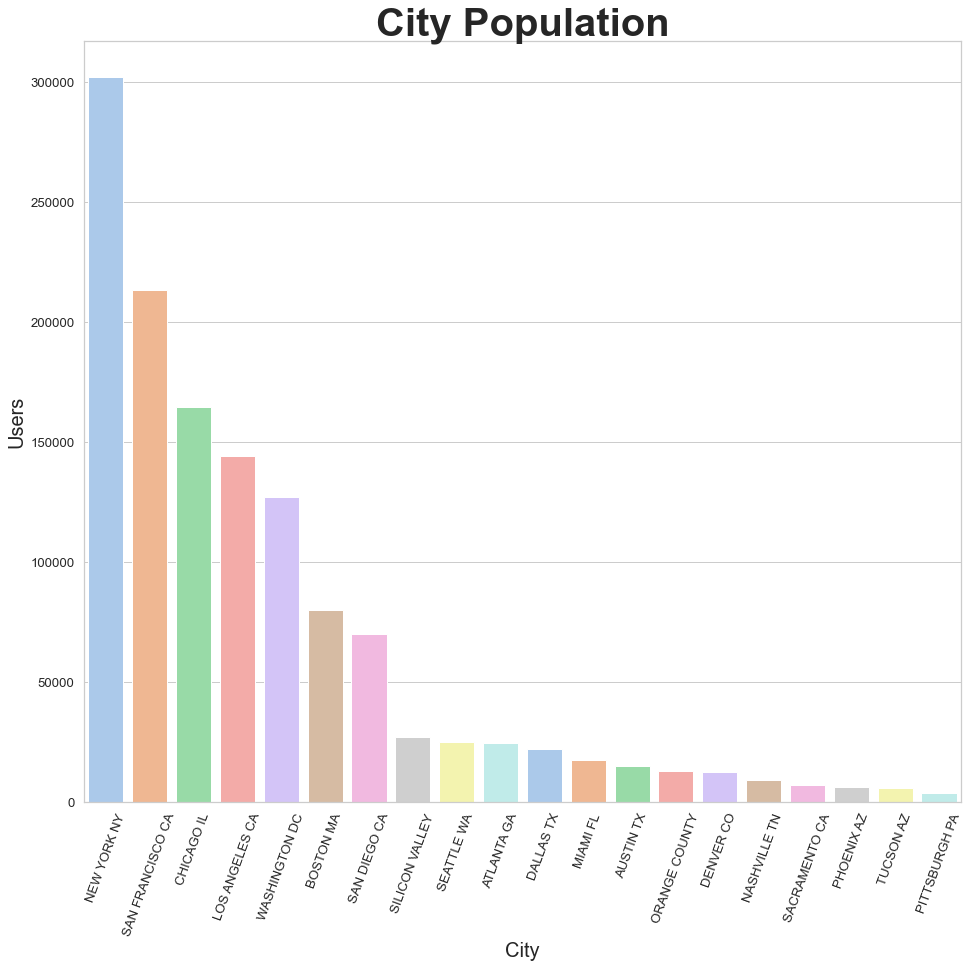

In [78]:
#Plotting the population per city
plt.figure(figsize=(14,14))
figure5 = sns.barplot(x="City", y="Users", data=df2, palette="pastel", order = df2.sort_values('Users', ascending = False)['City'])
plt.title("City Population", fontweight='bold', fontsize = 40)
sns.set_style("whitegrid")
figure5.set_xlabel("City", fontsize = 20)
figure5.set_ylabel("Users", fontsize = 20)
plt.xticks(rotation=70)

Despite having a significantly lower population, San Francisco has nearly the same amount of cab users as the nations largest city NYC.

c:\Users\gbore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


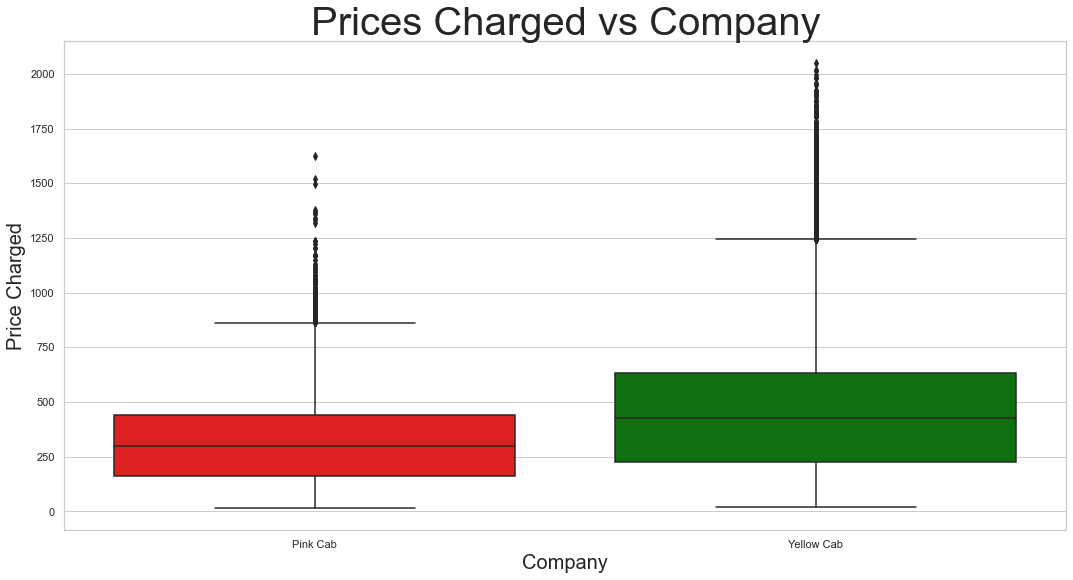

In [79]:
#Plotting the prices charged by these companies
sns.set(style = 'whitegrid')
plt.figure(figsize = (16, 9))
figure6 = sns.boxplot(dfdg['Company'], dfdg['Price Charged'],palette=['red', 'green'])
plt.title('Prices Charged vs Company', fontsize = 40)
figure6.set_xlabel("Company", fontsize = 20)
figure6.set_ylabel("Price Charged", fontsize = 20)
plt.show()

Yellow cabs charge higher prices.

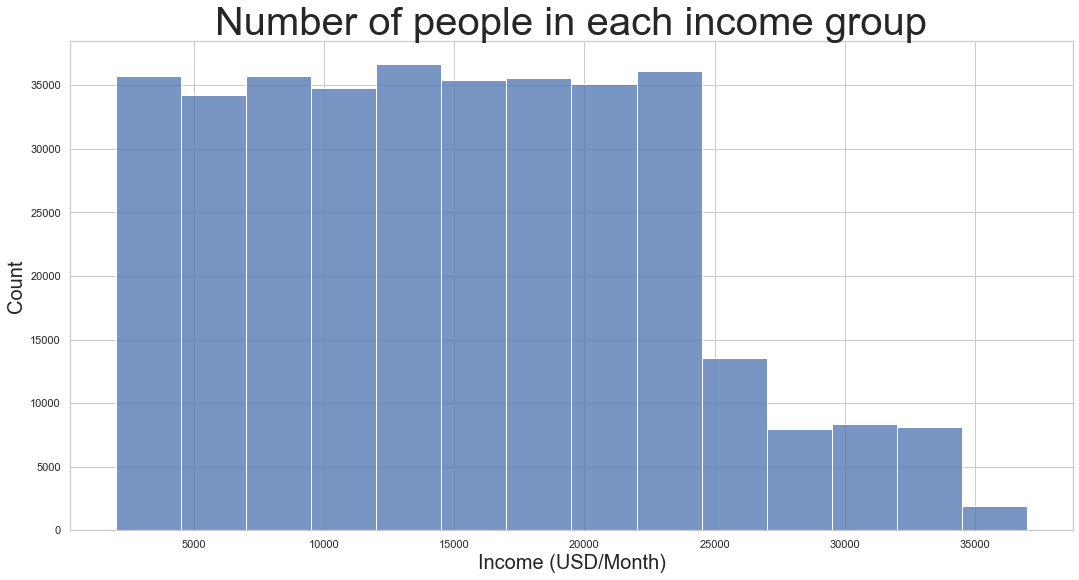

In [80]:
#Plotting the number of people by income group
plt.figure(figsize = (16, 9))
figure7 =sns.histplot(data=dfdg, x="Income (USD/Month)", binwidth=2500)
plt.title('Number of people in each income group', fontsize=40)
figure7.set_xlabel("Income (USD/Month)", fontsize = 20)
figure7.set_ylabel("Count", fontsize = 20)
plt.show()

Most people have incomes less than 25000 dollars a month and they are evenly distributed. After 25000 dollars a month, they are also evenly distributed but they have much lower values.

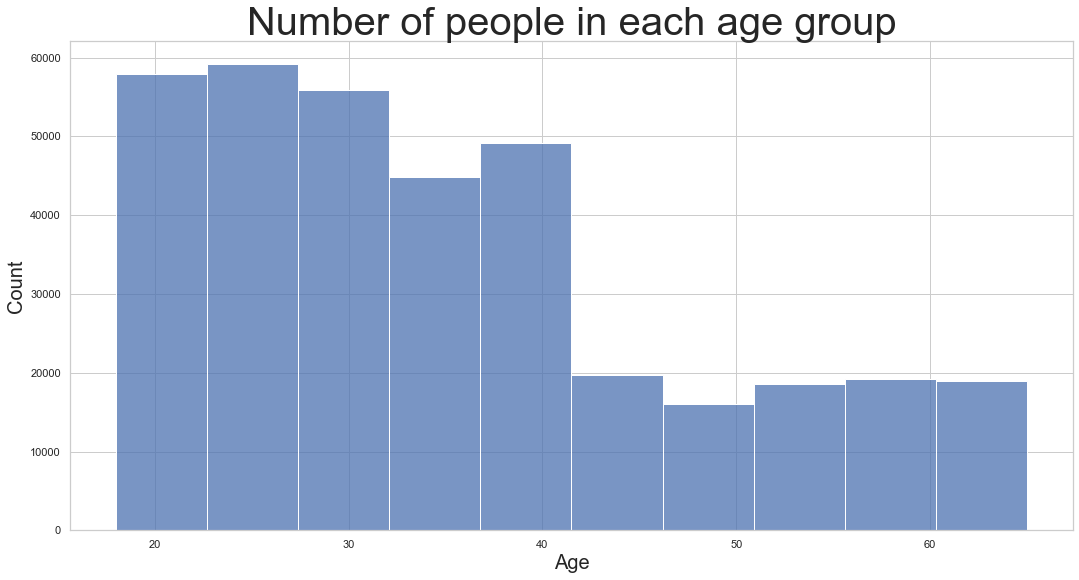

In [81]:
#Plotting the number of people by each age group
plt.figure(figsize = (16, 9))
figure8 =sns.histplot(data=dfdg, x="Age", bins=10)
plt.title('Number of people in each age group', fontsize=40)
figure8.set_xlabel("Age", fontsize = 20)
figure8.set_ylabel("Count", fontsize = 20)
plt.show()

People under 40(and especially under 30) use taxis a lot more than older people. 24-30 is the most common age of taxi usage.

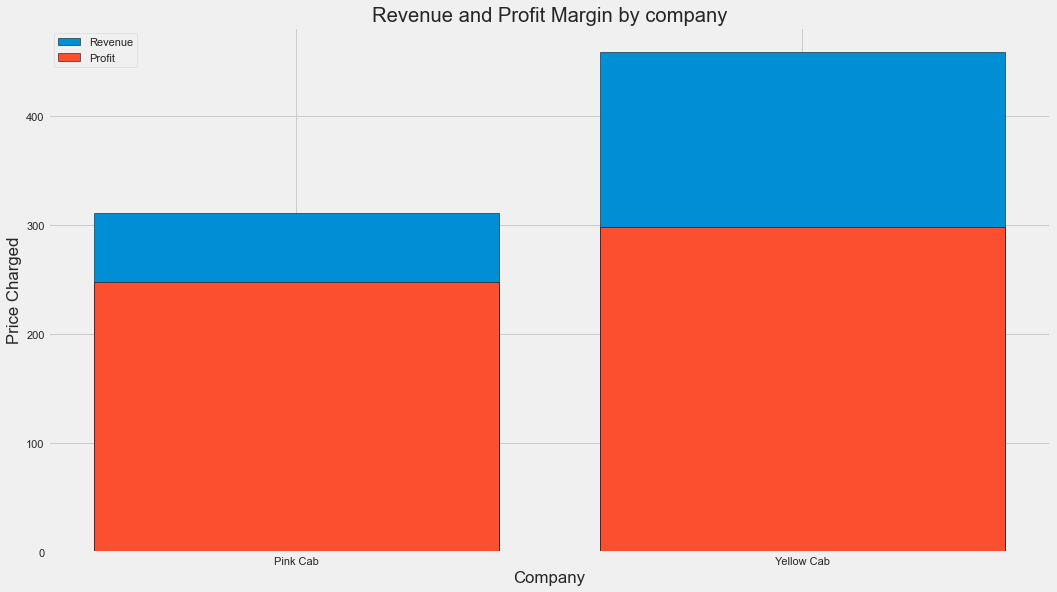

In [82]:
#Plotting stacked bar charts of the revenue generated and profit margins by company
company = dfdg.groupby('Company')
pricecharged = company['Price Charged'].mean()
costoftrip = company['Cost of Trip'].mean()
index = costoftrip.index
costvalues = costoftrip.values
pricevalues = pricecharged.values

plt.style.use('fivethirtyeight')
plt.figure(figsize = (16, 9))
plt.bar(index, pricevalues, edgecolor='black', label="Revenue")
plt.bar(index, costvalues, edgecolor='black', label="Profit")
plt.title('Revenue and Profit Margin by company')
plt.ylabel('Price Charged')
plt.xlabel('Company')
plt.legend()
plt.show()

Yellow cabs have a lot higher revenue and profit margin.

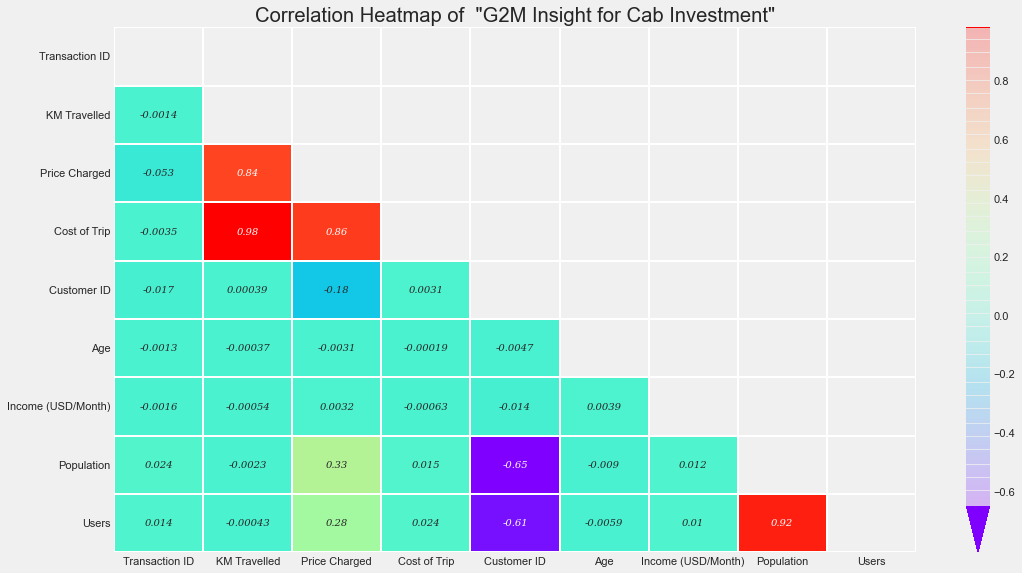

In [83]:
#Plotting the correlation matrix of the variables
plt.figure(figsize = (16, 9))

annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

matrix = np.triu(dfdg.corr())
ax = sns.heatmap(dfdg.corr(), mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)
plt.title('Correlation Heatmap of  "G2M Insight for Cab Investment"')
sns.set(font_scale = 1.2)

Insights from figure:-
1) The more people in a city, the more taxi users.
2) The further you travel, the more the trip costs and thus the more you pay.
3) If the trip costs more, you pay more. 

## Part 2:- External datasets EDA and visualizations

In [84]:
#Importing external datasets
#Importing cab data
df5 = pd.read_csv('inflationrate.csv')
#Importing city data
df6 = pd.read_csv('macroeconomics.csv')
#Importing customer ID data
df7 = pd.read_csv('US Holiday Dates (2004-2021).csv')
#Creating a list for these dataframes
extdfs = [df5, df6, df7]
#Naming what these dataframes contain
extdfnames = ["Inflation data", "Macroeconomic data", "Holiday data"]

In [85]:
#Looking at the shape of the dataframes
datashape = [x.shape for x in extdfs]
for (x,y) in zip(extdfnames, datashape):
    print(x + " : " + str(y))

Inflation data : (123, 3)
Macroeconomic data : (499, 8)
Holiday data : (342, 6)


The inflation data has 123 rows and 3 columns. The macroeconomic data has 499 rows and 8 columns. The holiday data has 342 rows and 6 columns.

In [86]:
#Looking at the size of the dataframes
datasize = [x.memory_usage(deep=True).sum() for x in extdfs]
for (x,y) in zip(extdfnames, datasize):
    print(x + " : " + str(y))

Inflation data : 9845
Macroeconomic data : 60632
Holiday data : 78984


In [87]:
#Converting the file size to kB.
for x in datasize:
    finaldatasize = convert_size(x)
    print(finaldatasize)

9.61 KB
59.21 KB
77.13 KB


Inflation data has a file size of 9.61 kB, the macroeconomic data is 59.21 kB and the holiday data is 77.13 kB.

In [88]:
#Printing out the column names for each dataframe
datacolumns = [x.columns for x in extdfs]
for (x,y) in zip(extdfnames, datacolumns):
    print(x + " : " + str(y))

Inflation data : Index(['Month', 'Monthly Inflation Rate', 'Annual Inflation Rate'], dtype='object')
Macroeconomic data : Index(['date', 'CPI', 'Mortgage_rate', 'Unemp_rate', 'NASDAQ',
       'disposable_income', 'Personal_consumption_expenditure',
       'personal_savings'],
      dtype='object')
Holiday data : Index(['Date', 'Holiday', 'WeekDay', 'Month', 'Day', 'Year'], dtype='object')


The inflation data has columns 'Month', 'Monthly Inflation Rate', and 'Annual Inflation Rate'. The macroeconomic data has columns 'date', 'CPI', 'Mortgage_rate', 'Unemp_rate', 'NASDAQ', 'disposable_income', 'Personal_consumption_expenditure', 'personal_savings' and the holiday data has columns 'Date', 'Holiday', 'WeekDay', 'Month', 'Day', and 'Year'.

In [89]:
#Looking at some general information for these columns in these dataframes
datainfo = [x.info() for x in extdfs]
print(datainfo)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month                   123 non-null    object 
 1   Monthly Inflation Rate  123 non-null    float64
 2   Annual Inflation Rate   123 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              499 non-null    object 
 1   CPI                               499 non-null    float64
 2   Mortgage_rate                     499 non-null    float64
 3   Unemp_rate                        499 non-null    float64
 4   NASDAQ                            499 non-null    float64
 5   disposable_income            

1) Inflation dataframe:- There are 123 non-null values, two columns of which are float data types and the other is an object in this dataframe.
2) Macroeconomic dataframe:- There are 499 non-null values, 7 columns of which are float data types and the other is an object like above.
3) Holiday dataframe:- There are 3 int objects and 3 other object types.

In [90]:
#Looking at the date values and their types
for x in df7['Date'], df6['date'], df5['Month']:
    for y in x:
        print(y) 
        print(type(y)) 

2004-07-04
<class 'str'>
2005-07-04
<class 'str'>
2006-07-04
<class 'str'>
2007-07-04
<class 'str'>
2008-07-04
<class 'str'>
2009-07-04
<class 'str'>
2010-07-04
<class 'str'>
2011-07-04
<class 'str'>
2012-07-04
<class 'str'>
2013-07-04
<class 'str'>
2014-07-04
<class 'str'>
2015-07-04
<class 'str'>
2016-07-04
<class 'str'>
2017-07-04
<class 'str'>
2018-07-04
<class 'str'>
2019-07-04
<class 'str'>
2020-07-04
<class 'str'>
2021-07-04
<class 'str'>
2004-12-25
<class 'str'>
2005-12-25
<class 'str'>
2006-12-25
<class 'str'>
2007-12-25
<class 'str'>
2008-12-25
<class 'str'>
2009-12-25
<class 'str'>
2010-12-25
<class 'str'>
2011-12-25
<class 'str'>
2012-12-25
<class 'str'>
2013-12-25
<class 'str'>
2014-12-25
<class 'str'>
2015-12-25
<class 'str'>
2016-12-25
<class 'str'>
2017-12-25
<class 'str'>
2018-12-25
<class 'str'>
2019-12-25
<class 'str'>
2020-12-25
<class 'str'>
2021-12-25
<class 'str'>
2004-12-24
<class 'str'>
2005-12-24
<class 'str'>
2006-12-24
<class 'str'>
2007-12-24
<class 'str'>


These are datetime objects.

In [91]:
#Taking a high-level look at all the data's first twenty rows for all twenty rows
dataskim = [x.head(n=20) for x in extdfs]
for (x,y) in zip(extdfnames, dataskim):
    print(x + " : " + str(y))

Inflation data :      Month  Monthly Inflation Rate  Annual Inflation Rate
0   23-Mar                     0.1                    5.0
1   23-Feb                     0.4                    6.0
2   23-Jan                     0.5                    6.4
3   22-Dec                     0.1                    6.5
4   22-Nov                     0.2                    7.1
5   22-Oct                     0.5                    7.7
6   22-Sep                     0.4                    8.2
7   22-Aug                     0.2                    8.3
8   22-Jul                     0.0                    8.5
9   22-Jun                     1.2                    9.1
10  22-May                     0.9                    8.6
11  22-Apr                     0.4                    8.3
12  22-Mar                     1.0                    8.5
13  22-Feb                     0.7                    7.9
14  22-Jan                     0.6                    7.5
15  21-Dec                     0.8                    7

In [92]:
#Looking at basic summary statistics
datastats = [x.describe() for x in extdfs]
for (x,y) in zip(extdfnames, datastats):
    print(x + " : " + str(y))

Inflation data :        Monthly Inflation Rate  Annual Inflation Rate
count              123.000000             123.000000
mean                 0.217073               2.565041
std                  0.289632               2.305410
min                 -0.800000              -0.200000
25%                  0.100000               1.250000
50%                  0.200000               1.800000
75%                  0.400000               2.500000
max                  1.200000               9.100000
Macroeconomic data :               CPI  Mortgage_rate  Unemp_rate        NASDAQ  disposable_income  \
count  499.000000     499.000000  499.000000    499.000000         499.000000   
mean   178.774886       7.420819    6.180962   2726.419046        9801.916633   
std     53.252920       3.454838    1.781931   3142.577570        3176.282199   
min     85.600000       2.684000    3.500000    167.382727        4965.000000   
25%    134.950000       4.518750    4.900000    479.524773        6861.450000   

Key statstics:-
1) Inflation data:- The monthly inflation rate has a mean of 0.22% and a median of 0.20%. It dipped to a minimum of  -0.80% and peaked at 1.20%. The annual inflation rate had an average of 2.57% and a median of 1.805. It ranged from -0.20% to 9.10% and had 2.31% as a measure of spread.
2) Macroeconomic data:- The mean values for the CPI = 178.8%, mortgage rate = 7.42%, Unemployment rate = 6.18%%, disposable income = $9801, and personal consumption expenditure = $7626. The median values are CPI = 177.4, mortgage rate = 6.83%, Unemployment rate = 5.70%, disposable income = $1884.73 and personal consumption expenditure = $7626. The ranges and standard deviations are shown above also.
3) The mean value of the results were early July, halfway through 2012 and late on the 15th day of the month. The range was from New Year's day in 2012 to the last day of 2021.

In [93]:
#Looking at basic summary statistics
datastats = [x.describe(include = 'object') for x in extdfs]
for (x,y) in zip(extdfnames, datastats):
    print(x + " : " + str(y))

Inflation data :          Month
count      123
unique     123
top     23-Mar
freq         1
Macroeconomic data :              date
count         499
unique        499
top     11/1/1980
freq            1
Holiday data :               Date            Holiday WeekDay
count          342                342     342
unique         336                 18       7
top     2007-04-08  Labor Day Weekend  Monday
freq             2                 36     109


There are 18 seperate holidays with Monday being the most common day for a holiday. 6 values also have two federal holidays on the same day like 04/08/2007. The months in the inflation dataframe and the dates in the macroeconomic data all have unique values. 

In [94]:
#Looking at the total number of values of each column
for (x,y) in zip(extdfs, datacolumns):
    for z in y:
        a = x[[z]].value_counts()
        print(a)

Month 
13-Apr    1
20-May    1
20-Jun    1
20-Jul    1
20-Jan    1
         ..
16-Apr    1
15-Sep    1
15-Oct    1
15-Nov    1
23-Mar    1
Length: 123, dtype: int64
Monthly Inflation Rate
 0.2                      29
 0.1                      19
 0.3                      15
 0.4                      14
 0.0                      13
-0.1                       7
 0.5                       7
 0.7                       3
-0.2                       3
 0.8                       3
-0.3                       2
 0.9                       2
 1.0                       1
-0.8                       1
 0.6                       1
-0.6                       1
-0.4                       1
 1.2                       1
dtype: int64
Annual Inflation Rate
 1.7                     8
 1.5                     7
 2.1                     6
 1.6                     6
 2.0                     6
 1.0                     5
 1.4                     5
 2.2                     5
 1.8                     4
 1.2        

Interesting insights:-
1) The most common monthly inflation rate is 0.2% with 29 values followed by 0.1, 0.3 and then 0.4, 0 following. It is even more interesting that this data follows the pattern 0.2 plus/minus 0.1 to get the next most common value.
2) The most common annual inflation rates are between 1.5% and 2.1%.
3) The most commonly reported CPI values were 162.0,177.4 and 97.7.
4) The most common unemployment rate was 5.4% with 24 values and 5.6% and 5.7% being the next two highest. 
5) Monday and Sunday were the most common days for federal holidays with 109 and 76 values respectively. Friday and Tuesday were the least with 22 and 20.

In [95]:
#Importing the datetime package from the datetime module
from datetime import datetime

#Converting the date objects which are strings to date types 
#Creating empty lists
y1 = []
y2 = []
y3 = []

#Appending the date values to these lists
for x in df5['Month']:   
    a = datetime.strptime(x, "%y-%b") 
    y3.append(a)

#Appending the date values to these lists
for x in df6['date']:   
    a = datetime.strptime(x, "%m/%d/%Y") 
    y1.append(a)

#Appending the date values to these lists
for x in df7['Date']:   
    a = datetime.strptime(x, "%Y-%m-%d") 
    y2.append(a)

#Dropping the dates of travel for these columns
df5 = df5.drop(columns='Month', axis=1)    
df6 = df6.drop(columns='date', axis=1)
df7 = df7.drop(columns='Date', axis=1)

#Adding new columns to the dataframe
df5['Month'] = pd.Series(y3)
df6['date'] = pd.Series(y1)
df7['Date'] = pd.Series(y2)

#Replacing the old data frames with new ones
extdfs.pop(0)
extdfs.insert(0, df5)
extdfs.insert(0, df6)
extdfs.insert(0, df7)

#Viewing the dataframes
print(df5)
print(df6)
print(df7)

     Monthly Inflation Rate  Annual Inflation Rate      Month
0                       0.1                    5.0 2023-03-01
1                       0.4                    6.0 2023-02-01
2                       0.5                    6.4 2023-01-01
3                       0.1                    6.5 2022-12-01
4                       0.2                    7.1 2022-11-01
..                      ...                    ...        ...
118                     0.0                    1.4 2013-05-01
119                    -0.2                    1.1 2013-04-01
120                    -0.3                    1.5 2013-03-01
121                     0.5                    2.0 2013-02-01
122                     0.2                    1.6 2013-01-01

[123 rows x 3 columns]
         CPI  Mortgage_rate  Unemp_rate        NASDAQ  disposable_income  \
0     85.600        14.2050         7.5    200.685556             4976.5   
1     86.400        14.7900         7.2    198.398636             4999.8   
2   

In [96]:
#Firstly, narrowing dates to the timeframe
df5narrowed = df5[(df5['Month']<datetime(2019,1,1)) & (df5['Month']>datetime(2016,1,30))] 
df6narrowed = df6[(df6['date']<datetime(2019,1,1)) & (df6['date']>datetime(2016,1,30))]
df7narrowed = df7[(df7['Date']<datetime(2019,1,1)) & (df7['Date']>datetime(2016,1,30))]

#Then looking at the statistics for the qualitative data points
for x in df5narrowed, df6narrowed, df7narrowed:
    a = x.describe(include = 'datetime')
    print(a)

                      Month
count                    35
unique                   35
top     2018-12-01 00:00:00
freq                      1
first   2016-02-01 00:00:00
last    2018-12-01 00:00:00
                       date
count                    35
unique                   35
top     2016-02-01 00:00:00
freq                      1
first   2016-02-01 00:00:00
last    2018-12-01 00:00:00
                       Date
count                    55
unique                   54
top     2017-04-16 00:00:00
freq                      2
first   2016-02-14 00:00:00
last    2018-12-31 00:00:00


C:\Users\gbore\AppData\Local\Temp/ipykernel_21664/1307686871.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  a = x.describe(include = 'datetime')
C:\Users\gbore\AppData\Local\Temp/ipykernel_21664/1307686871.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  a = x.describe(include = 'datetime')
C:\Users\gbore\AppData\Local\Temp/ipykernel_21664/1307686871.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the f

In [97]:
#Importing the sqldf package from the pandasql module
from pandasql import sqldf

#The SQL query below joins the inflation data table with the other macroeconomic indicators
query = '''
SELECT * 
FROM df6narrowed
INNER JOIN df5narrowed
ON df6narrowed.date = df5narrowed.Month
'''

#Running that query
dfext = sqldf(query)

#Dropping the month column 
dfext = dfext.drop('Month', axis = 1)

#Taking a high-level look at the first 20 results of this table
dfext.head(n=20)

,CPI,Mortgage_rate,Unemp_rate,NASDAQ,disposable_income,Personal_consumption_expenditure,personal_savings,date,Monthly Inflation Rate,Annual Inflation Rate
0,237.336,3.6600,4.9,4463.206000,13546.1,12526.3,7.2,2016-02-01 00:00:00.000000,-0.1,1.0
1,238.080,3.6940,5.0,4754.479545,13547.2,12506.8,7.6,2016-03-01 00:00:00.000000,0.3,0.9
2,238.992,3.6050,5.1,4892.168095,13522.0,12586.0,7.2,2016-04-01 00:00:00.000000,0.4,1.1
3,239.557,3.6000,4.8,4788.235238,13515.1,12624.4,6.9,2016-05-01 00:00:00.000000,0.2,1.0
4,240.222,3.5680,4.9,4856.232273,13521.5,12701.7,6.6,2016-06-01 00:00:00.000000,0.3,1.0
5,240.101,3.4400,4.8,5023.989000,13567.1,12720.6,6.8,2016-07-01 00:00:00.000000,-0.1,0.8
6,240.545,3.4350,4.9,5217.038261,13578.9,12749.8,6.8,2016-08-01 00:00:00.000000,0.2,1.1
7,241.176,3.4600,5.0,5254.154286,13608.3,12806.8,6.8,2016-09-01 00:00:00.000000,0.3,1.5
8,241.741,3.4700,4.9,5255.989048,13627.7,12828.1,6.9,2016-10-01 00:00:00.000000,0.2,1.6
9,242.026,3.7700,4.7,5260.565238,13657.8,12853.6,7.0,2016-11-01 00:00:00.000000,0.1,1.7


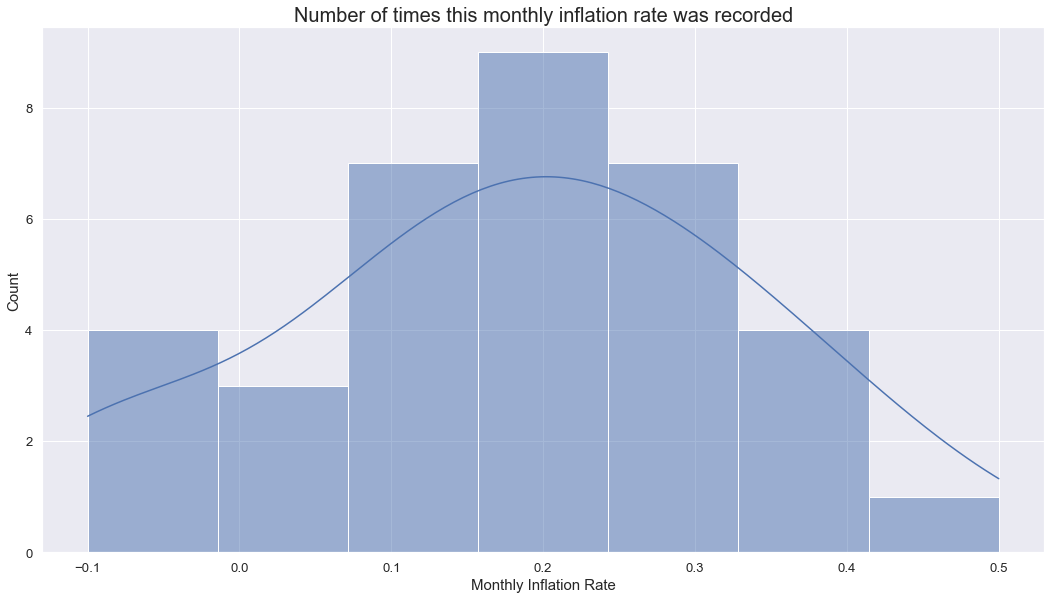

In [98]:
#Plotting a histogram of monthly inflation rates
plt.figure(figsize = (16, 9))
figure9 =sns.histplot(data=dfext, x="Monthly Inflation Rate", bins = 7, kde = True) 
plt.title('Number of times this monthly inflation rate was recorded', fontsize=20)
figure9.set_xlabel("Monthly Inflation Rate", fontsize = 15)
figure9.set_ylabel("Count", fontsize = 15)
plt.show()

This seems to be normally distributed around 0.2%.

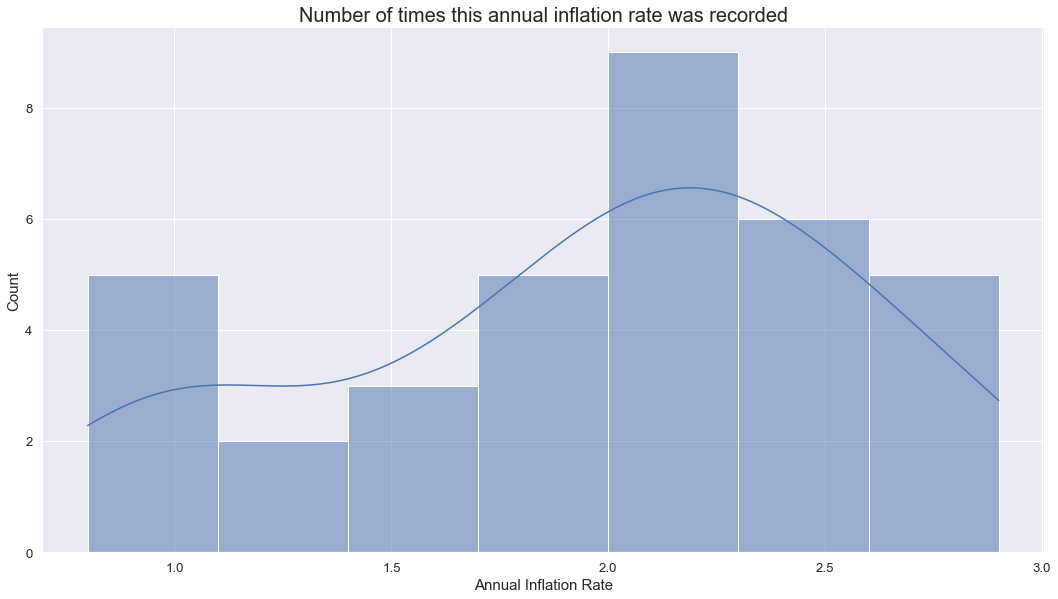

In [99]:
#Plotting a histogram of annual inflation rates
plt.figure(figsize = (16, 9))
figure10 =sns.histplot(data=dfext, x="Annual Inflation Rate", bins = 7, kde = True) 
plt.title('Number of times this annual inflation rate was recorded', fontsize=20)
figure10.set_xlabel("Annual Inflation Rate", fontsize = 15)
figure10.set_ylabel("Count", fontsize = 15)
plt.show()

The annual inflation rate is not normally distributed but it can be said to max around.

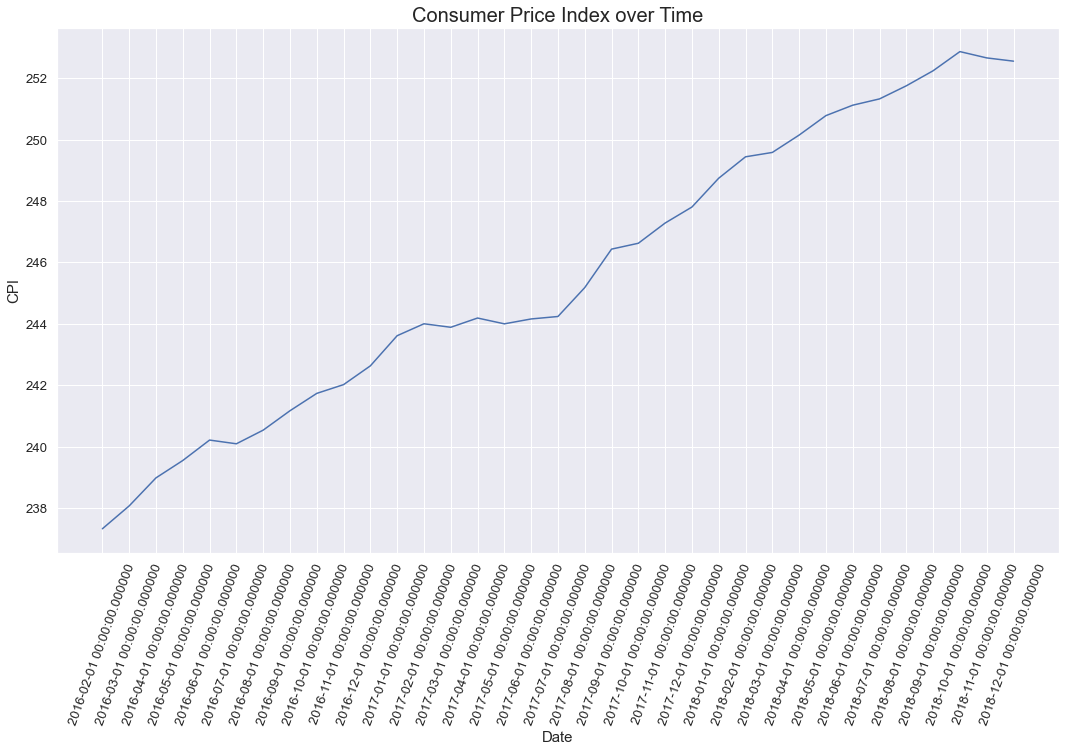

In [100]:
#Visualizing the consumer price index over time
plt.figure(figsize = (16, 9))
figure11 =sns.lineplot(data = dfext, x="date", y = "CPI") 
plt.title('Consumer Price Index over Time', fontsize=20)
figure11.set_xlabel("Date", fontsize = 15)
figure11.set_ylabel("CPI", fontsize = 15)
plt.xticks(rotation=70)
plt.show()


The CPI has been trending upwards over time.

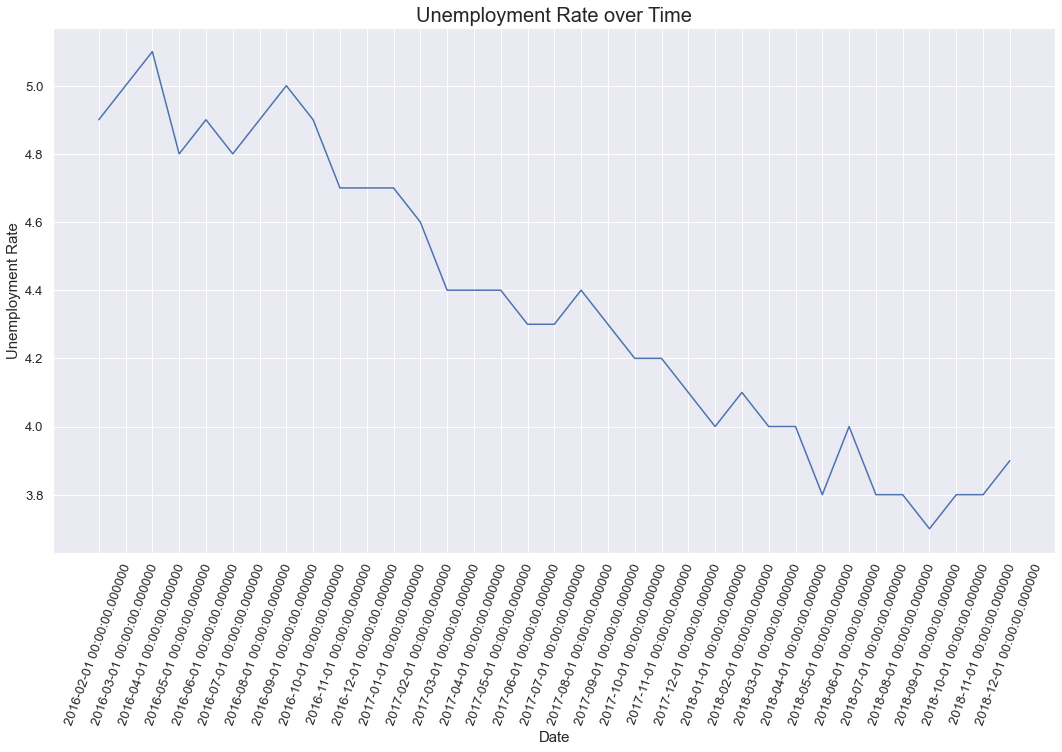

In [101]:
#Visualizing the unemployment rate over time
plt.figure(figsize = (16, 9))
figure12 =sns.lineplot(data = dfext, x="date", y = "Unemp_rate") 
plt.title('Unemployment Rate over Time', fontsize=20)
figure12.set_xlabel("Date", fontsize = 15)
figure12.set_ylabel("Unemployment Rate", fontsize = 15)
plt.xticks(rotation=70)
plt.show()

The unemployment rate has generally been slowly trending downwards over time.

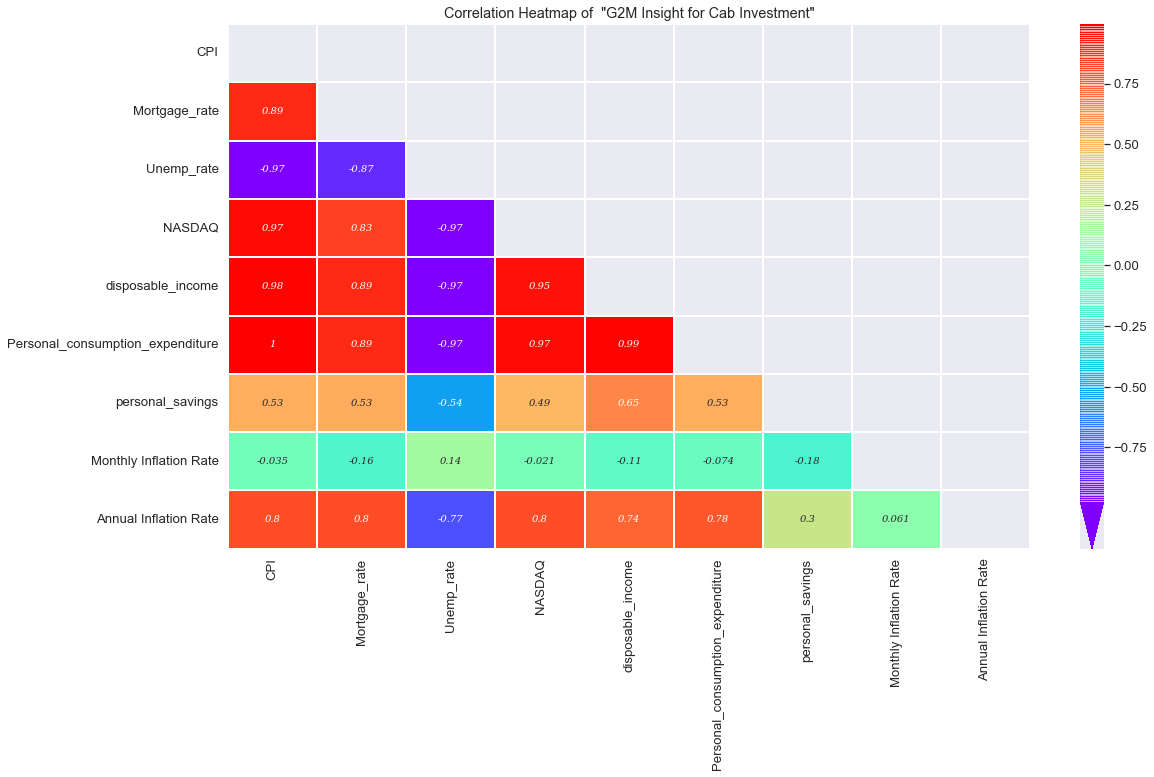

In [102]:
#Plotting the correlation matrix of the variables
plt.figure(figsize = (16, 9))

annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

matrix = np.triu(dfext.corr())
ax = sns.heatmap(dfext.corr(), mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)
plt.title('Correlation Heatmap of  "G2M Insight for Cab Investment"')
sns.set(font_scale = 1.2)

# Part 3:- Hypotheses testing

Here are the null hypotheses I came up with
1) There will be a spike of taxi users on holidays.
2) As inflation(both monthly and annual rates) rises, taxi profits will decrease due to there being fewer users.
3) As disposable incomes increase, so will taxi rides.
4) As personal consumption expenditure increases, so will the number of taxi rides.
5) A lower unemployment rate will lead to more taxi rides due to more disposable income.
6) A lower mortgage rate will lead to more taxi rides since less money will be spent on mortgage repayment.

In [103]:
#Importing the sqldf package from the pandasql module
from pandasql import sqldf

#The SQL query below joins the inflation data table with the other macroeconomic indicators
query = '''
SELECT COUNT(dfdg.[Transaction ID]) AS Users, dfdg.[Date of Travel]
FROM dfdg
INNER JOIN df7
ON dfdg.[Date of Travel] = df7.[Date]
GROUP BY dfdg.[Date of Travel]
'''

#Running that query
df8 = sqldf(query)

#Taking a high-level look at the first 20 results of this table
df8.head(n=20)

,Users,Date of Travel
0,105,2016-01-18 00:00:00.000000
1,377,2016-02-14 00:00:00.000000
2,97,2016-02-15 00:00:00.000000
3,375,2016-03-27 00:00:00.000000
4,424,2016-05-01 00:00:00.000000
5,149,2016-05-30 00:00:00.000000
6,443,2016-06-19 00:00:00.000000
7,158,2016-07-04 00:00:00.000000
8,682,2016-09-03 00:00:00.000000
9,686,2016-09-04 00:00:00.000000


In [3052]:
#Importing the sqldf package from the pandasql module
from pandasql import sqldf

#The SQL query below joins the inflation data table with the other macroeconomic indicators
query = '''
SELECT COUNT(dfdg.[Transaction ID]) AS Users, dfdg.[Date of Travel] FROM
dfdg
WHERE [Date of Travel] NOT IN (SELECT Date FROM df7)
GROUP BY [Date of Travel]
ORDER BY [Date of Travel] ASC
'''

#Running that query
df9 = sqldf(query)

#Taking a high-level look at the first 20 results of this table
df9.head(n=20)

,Users,Date of Travel
0,181,2016-01-02 00:00:00.000000
1,178,2016-01-03 00:00:00.000000
2,25,2016-01-04 00:00:00.000000
3,47,2016-01-05 00:00:00.000000
4,109,2016-01-06 00:00:00.000000
5,141,2016-01-07 00:00:00.000000
6,111,2016-01-08 00:00:00.000000
7,289,2016-01-09 00:00:00.000000
8,272,2016-01-10 00:00:00.000000
9,85,2016-01-11 00:00:00.000000


In [3053]:
#Getting the mean number of users on holidays and not on holidays and printing it
a = df8['Users'].mean()
b = df9['Users'].mean()
print("Holiday = " + str(a))
print("Not a holiday = " + str(b))

#Creating a list of the values and its attributes
meanusers = [a,b]
typeofday = ["Holiday", "Not a Holiday"]

Holiday = 347.3818181818182
Not a holiday = 327.64230769230767


Text(0, 0.5, 'Mean number of cab users')

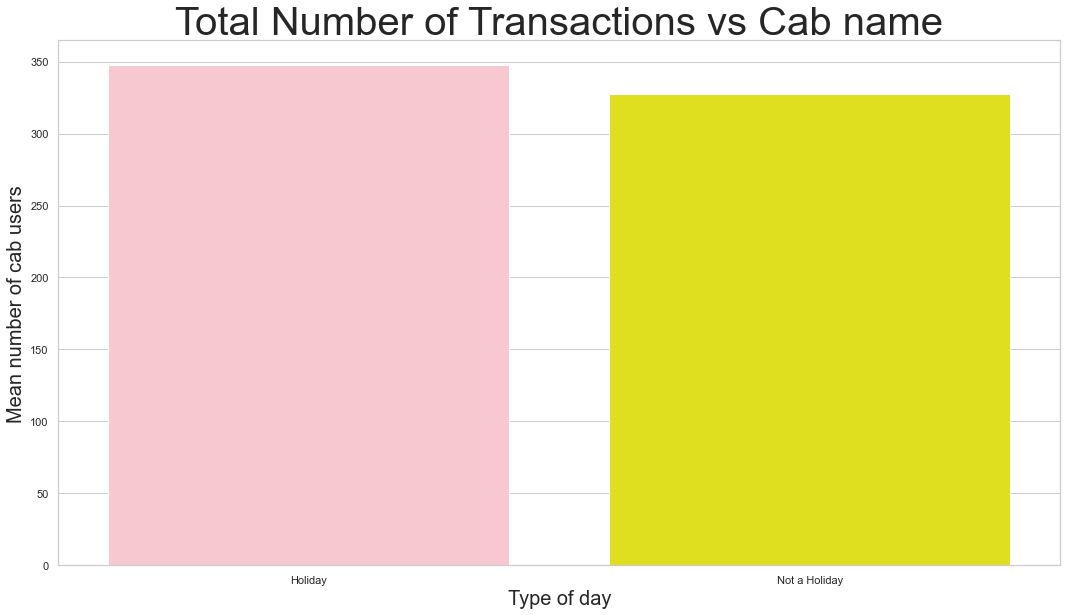

In [3064]:
#Plotting the total number of transactions per cab company
plt.figure(figsize = (16, 9))
figure13 = sns.barplot(x=typeofday, y = meanusers, palette=["pink","yellow"])
plt.title("Total Number of Transactions vs Cab name", fontsize = 40)
sns.set_style("whitegrid")
figure13.set_xlabel("Type of day", fontsize = 20)
figure13.set_ylabel("Mean number of cab users", fontsize = 20)

Cabs are used marginally more on holidays. I unfortunately could not test the rest of the hypotheses with the other data I generated due to time constraints.